# Abstract

# Introduction 

# Data

## Franke Function and Terrain Data
We will revisit these datasets from project one. For further description refer to the report for project 1 [1]

## MNIST Handwritten Numbers
For our classification problem we will be using the MNIST database of handwritten numbers, or more specifically a subset of this available as the digits dataset in scikit-learn[2]. 

This dataset contains pixel images of handwritten numbers. In total the digits dataset contains 1797 8x8 images. Meaning we have a dataset consisting of 1797 data points, each with 64 descriptors or inputs, and one output, the label. 

We can import this dataset and look at one of the datapoints.

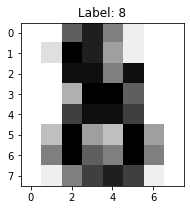

Figure 1: Plot of one of the entries in the digits dataset showing a number 8.


In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the data
digits = datasets.load_digits()

# Plot a datapoint; the first number in the set
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Label: %d" % digits.target[-1])
plt.show()
print("Figure 1: Plot of one of the entries in the digits dataset showing a number 8.")

We will use this dataset to fit and test our classification models. Before we can do this we need to split the data into a training set and a test set.

In [36]:
from sklearn.model_selection import train_test_split

# Setting the predictors/inputs and the target
digit_input = digits.images
digit_target = digits.target

# Splitting into training and test
train_size = 0.8
X_train, X_test, Y_train, Y_test = train_test_split(digit_input, digit_target, stratify=digit_target,
                                                    train_size=train_size)

I want to make sure that the different classes, i.e. the labels are similarly distributed among the test set and the training test. If for instance no occurrences of the label '3' is found in the training set, models trained on this set are expected to perform poorly on identifying such digits in the test set. That is why I have set the $\texttt{stratify}$ parameter in $\texttt{train_test_split()}$ above. Let us see if it did its job.

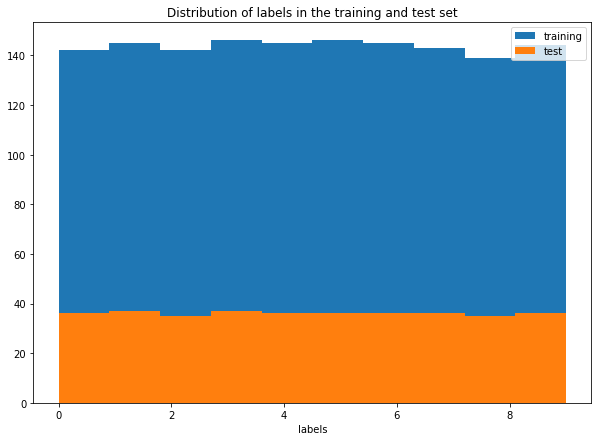

Figure 2: Histogram of label distribution in training and test set.


In [38]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(Y_train, label='training')
ax.hist(Y_test, label='test')
plt.legend() 
plt.xlabel("labels") 
plt.title("Distribution of labels in the training and test set")
  
# Show plot 
plt.show() 
print("Figure 2: Histogram of label distribution in training and test set.")

We see that the labels seem to be very evenly distributed.

# Methods
For descriptions of ordinary least squares and ridge regression, please refer to my report for project 1[1].

## Logistic Regression

Logistic regression is generally applied to (binary) classification problems. Logistic regression assumes the binomial distribution of the dependent variable. It applies a logistic function to model a binary dependent variable. Logistic regression on a binary outcome is often called binary logistic regression, and can be expended to multiple predictors. This is called multinomal logistic regression. 

Unlike linear regression, where the outputs take continuous values, we are now interested in discrete outputs, either binary 0/1 or more. To transform the continuous to discrete output we can use a so-called activation function. Several such functions can be used; the step function, the sigmoid, tanhh etc. 

For the sigmoid function we get

$$
\hat{y}_k = g(\beta^T X_k),\ g(z) = \frac{1}{1+\exp(-z)}
$$
where $g(z)$ is the sigmoid.

While we in linear regression used the mean square error as the cost function, this cost function will we non-convex for the logistic case. Therefore a different cost function is used, which we use maximum likelihood estimation to find. The result is the cross entropy. The cross-entropy is a convex function of the weights $\hat{\beta}$.

$$
\mathcal{C}(\hat{\beta})=-\sum_{i=1}^n  \left(y_i(\beta_0+\beta_1x_i) -\log{(1+\exp{(\beta_0+\beta_1x_i)})}\right).
$$

To minimize this function we find the derivatives, written compactly as 

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right).
$$

where $\hat{p}$ is a vector of fitted probabilities $p(y_i\vert x_i,\hat{\beta})$.

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a variation of the gradient descent method. There are many different variations of gradient descent but the common denomiator is that they work to find the minima of a function (typically the cost function) by iteratively moving in the direction of steepest descent.

In other words, if we want to find the minimum of a function $F(\mathbf{x})$, we should move in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

For a (typically small) stepsize $\gamma_k > 0$ known as the step size, or learning rate we then have 

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

An initial guess is made for $\mathbf{0}_k$.

For a convex cost function and a sufficiently small stepsize $\gamma_k$ this method can be used to find the global minimum of said cost function.

One drawback of this method is that computing the gradient for large datasets can be very computationally expensive. This is where SGD and its variations comes in. Instead of calculating the gradiant for all datapoints, SGD chooses a subset of the data to calculate the gradient on. The method divides the dataset into a set of $n/M$ so-called mini-batches, and for each step the gradient is calculated on one of these mini-batches. These minibatches are denoted by $B_k$ where $k=1,\cdots,n/M$.

Rewriting the gradient descent method in terms of a cost function $C(\mathbf{\beta})$, we get

$$
\mathbf{\beta}_{k+1} = \mathbf{\beta}_k - \gamma_k \nabla_{\beta} C(\mathbf{x}_k,\mathbf{\beta}_k),
$$

Taking the gradient with respect to one minibatch per step we get

$$
\beta_{k+1} = \beta_k - \gamma_k \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}_k)
$$

which is the stochastic gradient descent method.

[//]: # (Add momentum? Momentum based GD: http://localhost:8888/notebooks/Documents/Studier/fys-stk3155/Exercises/MachineLearning/doc/pub/Splines/ipynb/Splines.ipynb)



## Neural Network



# Results and Discussion

# Conclusion

# Bibliography

[1] Project 1: https://github.com/emiliefj/FYS-STK3155/blob/master/Project1/Report/Project%201%20-%20FYS-STK3155.pdf

[2] Digits dataset in scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

[3}